 ### The questions below relate to the bank.csv data file and the associated coulmn_meta.txt file that lists the column names.

1. Load the data and programmatically define the column names. Note: this part is "mostly" done for you below, but you have to modify two parts of the code below (read the comments to see which). Makes rue to look at the column_meta.txt file in a text editor so you can understand how the column names show up in that file. As you can also see, the bank.csv does not have the names as part of the file, which is why we are doing this here.

### The solution represents just one of the many ways to approach the below questions

In [1]:
import numpy as np
import pandas as pd

In [2]:
bank=pd.read_csv("bank.csv",header=None)

# Without using header=None, the read function will assume the first row as the header

In [3]:
col_nm_file = open("column_meta.txt", "r") 
col_nms = col_nm_file.readlines(-1)
col_nm_file.close()

In [4]:
def column_names(col_nm_list):
    col_names=[]
    for i in col_nm_list:
        if i[0].isdigit(): #The function isnumeric() does the job as well
            header=i.split("-")[1]
            header_2=header.split()[0]
            col_names.append(header_2)
    return col_names
Col_names=column_names(col_nms)
print (Col_names)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day_of_the_month', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed']


In [5]:
bank.columns=Col_names

In [6]:
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_the_month,month,duration,campaign,pdays,previous,poutcome,subscribed
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


2. Find the mean, min and max duration of campaign for all the customers that did not subscribe to a term deposit.

In [7]:
Q2 = bank[bank["subscribed"]=="no"]["duration"].describe()
Q2[['mean', 'min', 'max']]

#The usage of "campaign" column to calculate the stats is incorrect

mean     226.3475
min        4.0000
max     3025.0000
Name: duration, dtype: float64

3. How many married people with both housing loan and personal loan subscribed to the term deposit on first time being campaigned?

This question is open to many interpretations. "First time being campained" may be viewed in one of the following ways:
1. No previous campaigns
2. First attempt as part of this campaign
3. No previous campaigns and first attempt of this campaign (both inclusive)

Few of you have used the condition "pdays=999" which, according to the description in the metadata file, is correct as well.

In [11]:
Q3_1 = bank[((bank["housing"]=="yes") & (bank["loan"]=="yes")) & (bank["marital"].str.contains("married")) & (bank["previous"]==0) & (bank["subscribed"]=="yes")]
print("Case 1:",len(Q3_1))

Q3_2 = bank[((bank["housing"]=="yes") & (bank["loan"]=="yes")) & (bank["marital"].str.contains("married")) & (bank["campaign"]==1) & (bank["subscribed"]=="yes")]
print("Case 2:",len(Q3_2))

Q3_3 = bank[((bank["housing"]=="yes") & (bank["loan"]=="yes")) & (bank["marital"].str.contains("married")) & (bank["previous"]==0) & (bank["campaign"]==1) & (bank["subscribed"]=="yes")]
print("Case 3:",len(Q3_3))

Case 1: 9
Case 2: 6
Case 3: 4


4. Optional Question (no credit, or no extra credit): Find the top five categories of customers(by job) that required maximum campaigning duration to subscribe to the term deposit.

In [9]:
Q4_1 = bank[bank["subscribed"]=="yes"]
Q4_2 = Q4_1.groupby("job")[["duration"]].mean()
Q4_3 = Q4_2.sort_values(by="duration",ascending=False).head(5)
print(Q4_3)

                 duration
job                      
entrepreneur   765.466667
blue-collar    709.927536
self-employed  662.950000
services       640.736842
unemployed     599.230769


5. Draw a histogram of "day_of_the_month" and provide insights based on the distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208DF7B7080>]],
      dtype=object)

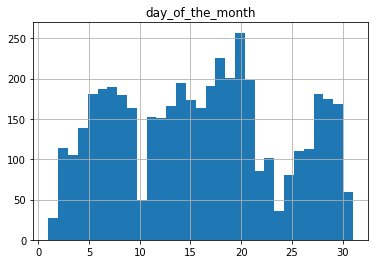

In [11]:
bank.hist(["day_of_the_month"],bins=31)

* The histogram shows a multimodal distribution
* The campaigning is intense during the third week of any month i.e, ususally between 14 and 21